# <b>Exploratory Analysis of the Irish Times Headlines</b>

In [2]:
import pandas as pd                                               #to import the data info dataframe from csv or manipulation
import numpy as np                                                #to perform numerical operations and array manipulations
import matplotlib.pyplot as plt                                   #to plot data visualizations
import matplotlib.cm as cm                                        #to access colormaps for data visualization  
import seaborn as sns                                             #to create statistical data visualizations
from wordcloud import WordCloud                                   #to create word clouds from text data to visualize most frequent words
from collections import Counter                                   #to count the frequency of words or items in a dataset
import nltk                                                       #Natural Language Toolkit for text processing and analysis
from nltk.corpus import stopwords                                 #to remove common words ('stopwords') from the text, improving analysis
from textblob import TextBlob                                     #to perform sentiment analysis, where the polarity attribute gives a value between -1 (negative) and 1 (positive)
from sklearn.model_selection import train_test_split              #to split the dataset into training and testing sets for machine learning models
from sklearn.feature_extraction.text import CountVectorizer       #to convert the headline text into a Bag of Words representation
from sklearn.ensemble import RandomForestClassifier               #to classify text data into categories using a Random Forest model
from sklearn.metrics import accuracy_score, classification_report #to evaluate the model performance with accuracy score and detailed classification report
from sklearn.pipeline import make_pipeline                        #to create a pipeline that automates preprocessing and modeling steps in machine learning
import warnings                                                   #to handle warnings during code execution
warnings.filterwarnings("ignore")                                 #to suppress warnings for cleaner output

<b>Load the data:</b>

In [4]:
dataset = pd.read_csv("ireland-news-headlines.csv")

In [5]:
dataset.head() #to display the first five rows of the dataset for a quick overview of the data

publish_date headline_category  \
0      19960102              news   
1      19960102              news   
2      19960102              news   
3      19960102              news   
4      19960102              news   

                                     headline_text  
0         UUP sees possibility of voting Major out  
1   Pubs targeted as curbs on smoking are extended  
2  Papers reveal secret links with O'Neill cabinet  
3      Domestic chaos as Italy takes EU presidency  
4     Learning about the star to which we owe life

In [6]:
dataset.tail() #to display the last five rows of the dataset for a quick overview of the data

publish_date         headline_category  \
1611490      20210630  news.politics.oireachtas   
1611491      20210630                   culture   
1611492      20210630              sport.others   
1611493      20210630               news.health   
1611494      20210630                   culture   

                                             headline_text  
1611490  Reserve members of Defence Forces to be allowe...  
1611491  Maureen Dowd: Joe Biden is 'crazy about the Ir...  
1611492  Andy Murray rolls back the years to own Centre...  
1611493  Delta variant could do 'significant damage' in...  
1611494  Gordon Brown: 'We've got to give people a mess...

<b>Characterisation of the dataset:</b>

Description of size, number of rows and features

In [9]:
size = dataset.shape
print("Size of dataset:", size)

size = dataset.shape[0]
print("Number of rows:", size)

size = dataset.shape[1]
print("Number of features:", size)

Size of dataset: (1611495, 3)
Number of rows: 1611495
Number of features: 3


Number and description of attributes

In [11]:
print("Attributes:")
for index, column in enumerate(dataset.columns):
    print(f"{index + 1}: {column}")

Attributes:
1: publish_date
2: headline_category
3: headline_text


In [12]:
category_counts = dataset["headline_category"].value_counts()
print(category_counts)

headline_category
news                               580242
sport                              158683
business                           111435
opinion.letters                     79276
opinion                             49946
                                    ...  
lifestyle.food.restaurant             203
news.technology                       191
business.markets.bonds                127
lifestyle.abroad.working-abroad       116
news.health.coronavirus               104
Name: count, Length: 103, dtype: int64


103 categories found

In [14]:
category_counts_df = category_counts.reset_index()
category_counts_df.columns = ["headline_category", "count"]
print(category_counts_df.head(10)) #displays the 10 most common categories

  headline_category   count
0              news  580242
1             sport  158683
2          business  111435
3   opinion.letters   79276
4           opinion   49946
5           culture   45800
6      sport.soccer   40903
7      news.ireland   30241
8       news.health   24858
9   lifestyle.homes   23586


<b>Has/does not have missing values:</b>

In [16]:
#Check for missing values in the dataset
if dataset.isnull().values.any():
    print("The dataset contains missing values.")
    
    #Count the number of columns with missing values
    number_of_columns_with_missing_values = dataset.isnull().sum()[dataset.isnull().sum() > 0].count()
    print("Number of columns with missing values:", number_of_columns_with_missing_values)

    #Calculate the number of missing values per column
    missing_data = dataset.isnull().sum()

    #Calculate the percentage of missing values per column
    missing_percentage = (missing_data / len(dataset)) * 100

    #Display information about missing values
    missing_info = pd.DataFrame({
        'Missing Values': missing_data,
        'Percentage': missing_percentage
    })

    print(missing_info)
else:
    print("There are no missing values in the dataset.")

The dataset contains missing values.
Number of columns with missing values: 1
                   Missing Values  Percentage
publish_date                    0    0.000000
headline_category               0    0.000000
headline_text                   7    0.000434


We detected only 7 missing values in the 'headline_text' column, representing an insignificant percentage of 0.000434% of the total data. Given the minimal impact on the integrity of the dataset, we chose to remove these rows to ensure the consistency of the analysis.

In [18]:
#Remove the rows with missing values directly in the original dataset
dataset.dropna(inplace=True)

#Check the new size of the dataset after removal
print("Dataset after removal of missing values:", dataset.shape)

Dataset after removal of missing values: (1611488, 3)


## <u><b>Data preparation and exploratory data analysis (EDA)</u></b>

In [20]:
dataset["publish_date"] = pd.to_datetime(dataset["publish_date"], format="%Y%m%d")
#Converting the 'publish date' column into 3 new columns, 'year', 'month', 'day', and 'day of week'
#to analyze how many headlines were published per year, per month, and/or on specific days of the week

In [21]:
dataset["year"] = dataset["publish_date"].dt.year
dataset["month"] = dataset["publish_date"].dt.month
dataset["day"] = dataset["publish_date"].dt.day
dataset["day_of_week"] = dataset["publish_date"].dt.day_name()

In [22]:
dataset.head() #to display the first five rows of the dataset for a quick overview of the data after converting

publish_date headline_category  \
0   1996-01-02              news   
1   1996-01-02              news   
2   1996-01-02              news   
3   1996-01-02              news   
4   1996-01-02              news   

                                     headline_text  year  month  day  \
0         UUP sees possibility of voting Major out  1996      1    2   
1   Pubs targeted as curbs on smoking are extended  1996      1    2   
2  Papers reveal secret links with O'Neill cabinet  1996      1    2   
3      Domestic chaos as Italy takes EU presidency  1996      1    2   
4     Learning about the star to which we owe life  1996      1    2   

  day_of_week  
0     Tuesday  
1     Tuesday  
2     Tuesday  
3     Tuesday  
4     Tuesday

### <b><u>Visual Analyses</u></b>

To explore the distribution of the data over time, we can create some visual analyses to understand trends:

### <b>Temporal Analysis of Headlines</b>

<b>Count headlines by year</b>

We can visualize how many headlines were published each year to understand if there was an increase or decrease in news coverage

In [28]:
headline_counts_per_year = dataset["year"].value_counts().sort_index()

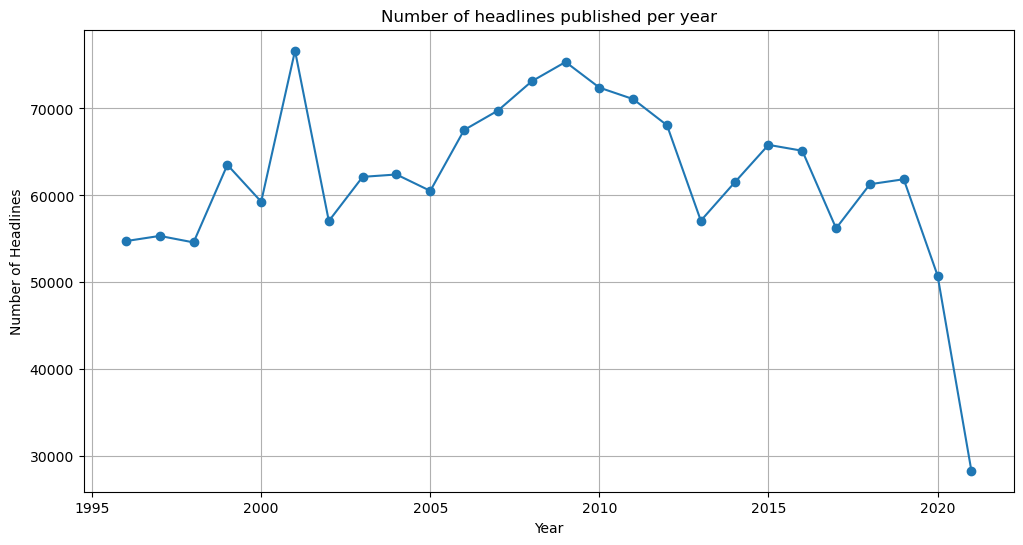

In [29]:
#Create line chart
plt.figure(figsize=(12, 6))
plt.plot(headline_counts_per_year.index, headline_counts_per_year.values, marker="o", linestyle="-")
plt.xlabel("Year")
plt.ylabel("Number of Headlines")
plt.title("Number of headlines published per year")
plt.grid(True)
plt.show()

<b>Analyze monthly distribution</b>

To understand if there are months of the year with more headlines published, we can group the data by month

In [32]:
headline_counts_per_month = dataset["month"].value_counts().sort_index()

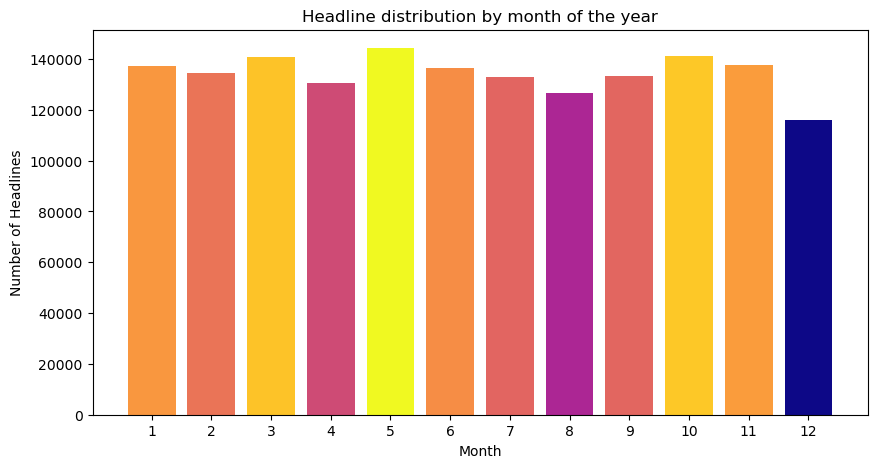

In [33]:
#Normalize the values to apply a color gradient
values = headline_counts_per_month.values
norm = plt.Normalize(values.min(), values.max())  
colors = cm.plasma(norm(values))

#Create the bar chart with gradient colors
plt.figure(figsize=(10, 5))
plt.bar(headline_counts_per_month.index, values, color=colors)

#Chart Settings
plt.xlabel("Month")
plt.ylabel("Number of Headlines")
plt.title("Headline distribution by month of the year")
plt.xticks(range(1, 13))
plt.show()

<b>Analyze days of the month with most headlines</b>

In [35]:
#Count the number of headlines published per day of the month
headline_counts_per_day = dataset["day"].value_counts().sort_index()

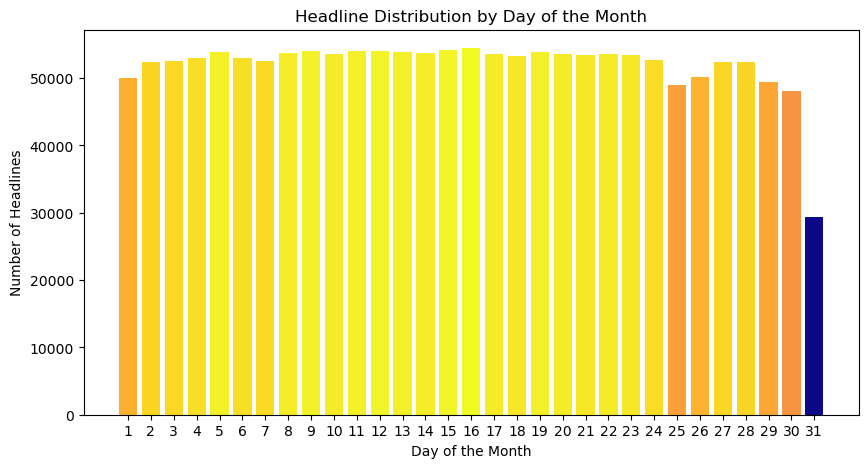

In [36]:
#Normalize the values to apply a color gradient
values = headline_counts_per_day.values
norm = plt.Normalize(values.min(), values.max())  
colors = cm.plasma(norm(values))

#Create the bar chart with gradient colors
plt.figure(figsize=(10, 5))
plt.bar(headline_counts_per_day.index, values, color=colors)

#Chart Settings
plt.xlabel("Day of the Month")
plt.ylabel("Number of Headlines")
plt.title("Headline Distribution by Day of the Month")
plt.xticks(range(1, 32))  #Assume a maximum of 31 days in the month
plt.show()

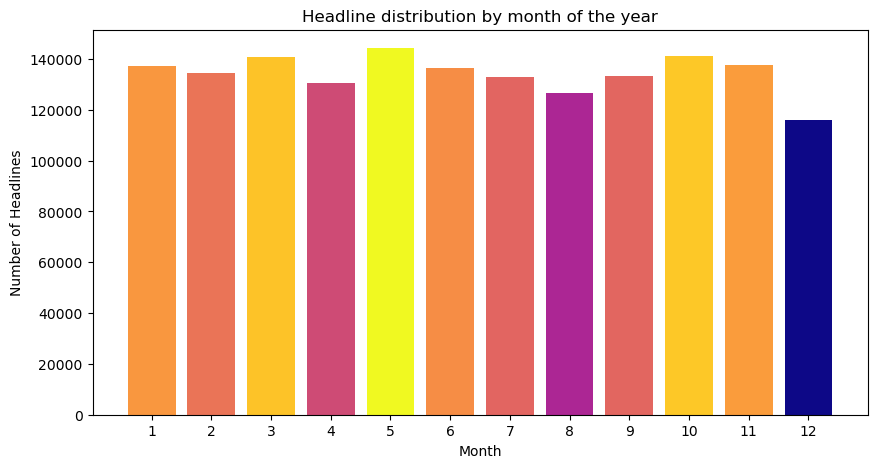

In [37]:
#Normalize the values to apply a color gradient
values = headline_counts_per_month.values
norm = plt.Normalize(values.min(), values.max())  
colors = cm.plasma(norm(values))

#Create the bar chart with gradient colors
plt.figure(figsize=(10, 5))
plt.bar(headline_counts_per_month.index, values, color=colors)

#Chart Settings
plt.xlabel("Month")
plt.ylabel("Number of Headlines")
plt.title("Headline distribution by month of the year")
plt.xticks(range(1, 13))
plt.show()

<b>Analyze days of the week with most headlines</b>

To know which days of the week had the most headlines published

In [40]:
headline_counts_per_day = dataset["day_of_week"].value_counts()

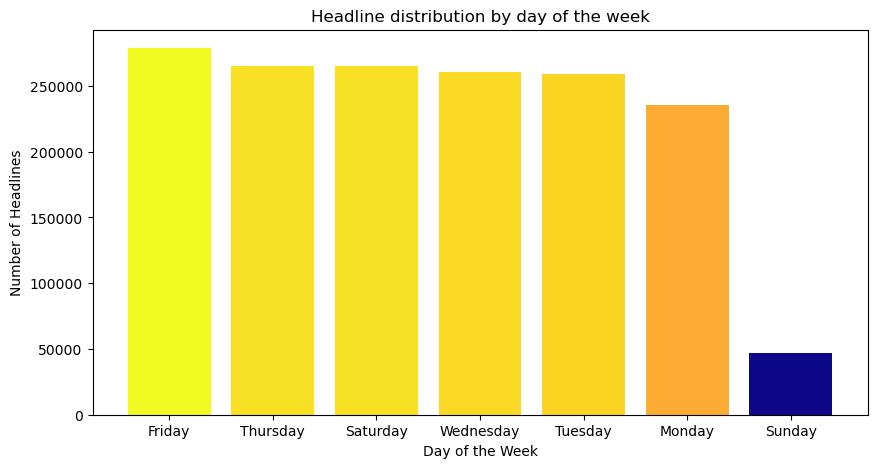

In [41]:
#Normalize the values to apply a color gradient
values = headline_counts_per_day.values
norm = plt.Normalize(values.min(), values.max())  
colors = cm.plasma(norm(values))

#Create the bar chart with gradient colors
plt.figure(figsize=(10, 5))
plt.bar(headline_counts_per_day.index, values, color=colors)

#Chart Settings
plt.xlabel("Day of the Week")
plt.ylabel("Number of Headlines")
plt.title("Headline distribution by day of the week")
plt.show()

### <b>Category Analysis</b>

In [43]:
#Count how many headlines exist by category
category_counts = dataset["headline_category"].value_counts()

In [44]:
#Select the 10 most common categories
top_10_categories = category_counts.head(10)

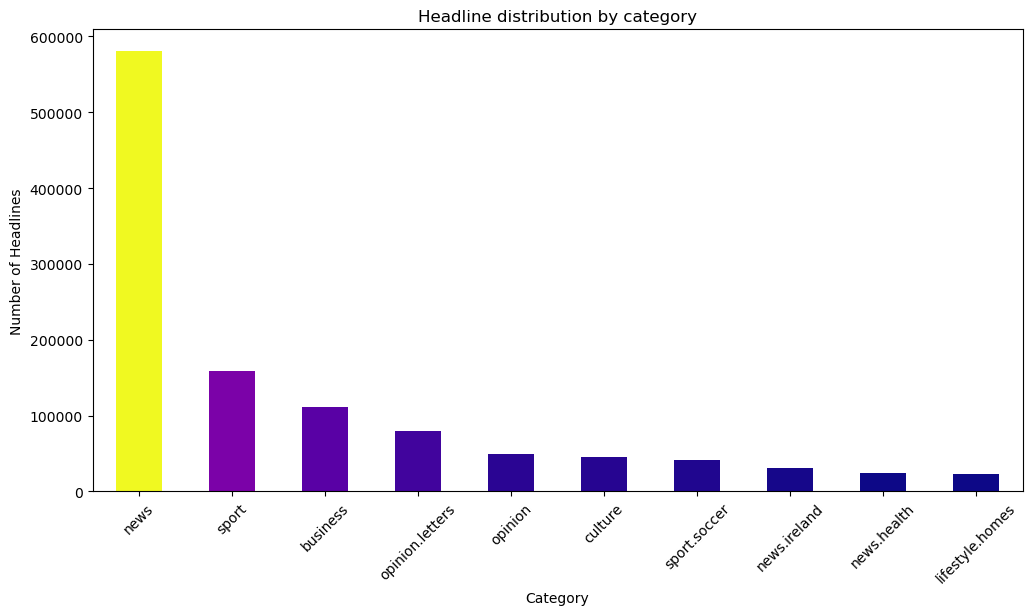

In [45]:
#Normalize the values to apply a color gradient
values = top_10_categories.values
norm = plt.Normalize(values.min(), values.max())  
colors = cm.plasma(norm(values))

#Create the bar chart with gradient colors
plt.figure(figsize=(12, 6))
top_10_categories.plot(kind="bar", color=colors)

#Chart Settings
plt.xlabel("Category")
plt.ylabel("Number of Headlines")
plt.title("Headline distribution by category")
plt.xticks(rotation=45)
plt.show()

In [46]:
#Count the number of headlines by category and year
category_per_year = dataset.groupby(["year", "headline_category"]).size().reset_index(name="count")

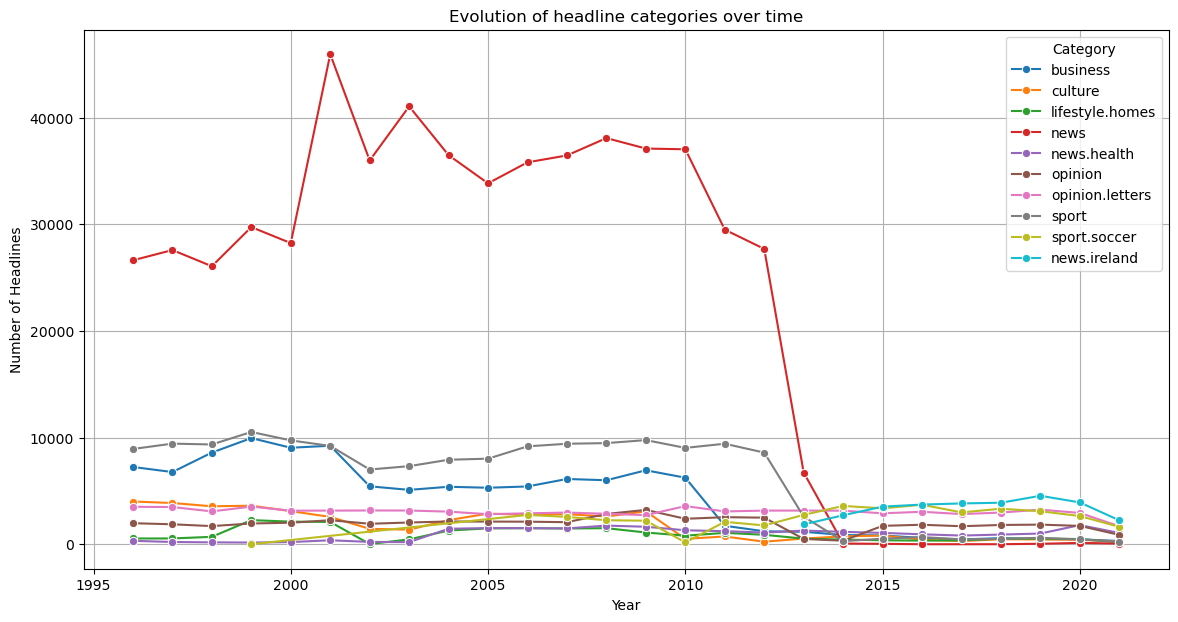

In [47]:
#Filter to include only the top 10 most common categories
top_10_categories = category_counts.head(10).index
category_per_year_filtered = category_per_year[category_per_year["headline_category"].isin(top_10_categories)]

#Create a line chart to visualize the evolution of categories over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=category_per_year_filtered, x="year", y="count", hue="headline_category", marker="o")

plt.xlabel("Year")
plt.ylabel("Number of Headlines")
plt.title("Evolution of headline categories over time")
plt.legend(title="Category")
plt.grid(True)
plt.show()

### <b>Word Frequency Analysis</b>

In [49]:
pip install wordcloud nltk matplotlib

Note: you may need to restart the kernel to use updated packages.


In [50]:
#Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

#Ensure 'year' is numeric (if it isn't already)
dataset['year'] = pd.to_numeric(dataset['year'], errors='coerce')

#Define a function to preprocess and get frequent words for a given period
def get_top_keywords_by_period(df, period='year'):
    #Group by the period (year or month)
    if period == 'year':
        df['period'] = df['year']
    elif period == 'month':
        df['period'] = df['month']
    else:
        raise ValueError("Period must be 'year' or 'month'")
    
    #For each period, get the most common words
    keywords_by_period = {}
    for period_value, group in df.groupby('period'):
        #Handle NaN values in the 'headline_text' column (convert NaN to empty string)
        headlines = ' '.join(group['headline_text'].fillna('').astype(str))  #Fill NaN and ensure strings
        words = [word.lower() for word in headlines.split() if word.isalpha() and word.lower() not in stop_words]
        word_counts = Counter(words)
        keywords_by_period[period_value] = word_counts.most_common(10)
    
    return keywords_by_period

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lvclu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
#Get top keywords for each year
top_keywords_by_year = get_top_keywords_by_period(dataset, period='year')

#Print the top 10 keywords for each year
for year, keywords in top_keywords_by_year.items():
    print(f"Top keywords for {year}:")
    for word, count in keywords:
        print(f"  {word}: {count}")
    print("\n")

Top keywords for 1996:
  new: 1538
  man: 1352
  irish: 1163
  says: 909
  may: 835
  dublin: 733
  us: 664
  eu: 648
  court: 622
  talks: 621


Top keywords for 1997:
  new: 1546
  man: 1216
  irish: 1109
  says: 985
  may: 827
  court: 687
  us: 673
  dublin: 611
  talks: 543
  case: 535


Top keywords for 1998:
  new: 1488
  irish: 1112
  man: 1053
  says: 841
  may: 764
  us: 744
  court: 647
  dublin: 608
  report: 594
  market: 587


Top keywords for 1999:
  new: 1751
  irish: 1272
  man: 1238
  says: 965
  may: 867
  us: 774
  dublin: 711
  court: 664
  ireland: 515
  plan: 507


Top keywords for 2000:
  new: 1554
  irish: 1082
  man: 1049
  may: 833
  says: 796
  us: 726
  dublin: 705
  court: 633
  plan: 505
  ireland: 480


Top keywords for 2001:
  us: 2256
  new: 2016
  man: 1596
  says: 1586
  irish: 1452
  may: 1133
  court: 1033
  dublin: 990
  eu: 833
  ireland: 777


Top keywords for 2002:
  us: 1883
  new: 1475
  says: 1398
  irish: 1169
  man: 1123
  eu: 886
  may: 8

In [52]:
#Get top keywords for each month
top_keywords_by_month = get_top_keywords_by_period(dataset, period='month')

#Print the top 10 keywords for each month
for month, keywords in top_keywords_by_month.items():
    print(f"Top keywords for month {month}:")
    for word, count in keywords:
        print(f"  {word}: {count}")
    print("\n")

Top keywords for month 1:
  new: 4362
  irish: 3880
  says: 3199
  man: 2835
  us: 2778
  dublin: 2316
  ireland: 2080
  may: 1806
  court: 1769
  eu: 1485


Top keywords for month 2:
  new: 3773
  irish: 3742
  says: 3266
  man: 2791
  us: 2691
  ireland: 2632
  dublin: 2429
  court: 1832
  may: 1623
  eu: 1440


Top keywords for month 3:
  irish: 4366
  new: 3878
  says: 3440
  us: 3011
  ireland: 2985
  man: 2841
  dublin: 2401
  may: 1785
  court: 1717
  eu: 1708


Top keywords for month 4:
  irish: 3630
  new: 3620
  says: 3273
  us: 2772
  man: 2677
  dublin: 2330
  ireland: 1965
  may: 1770
  court: 1486
  eu: 1291


Top keywords for month 5:
  new: 4183
  irish: 4052
  says: 3613
  man: 2844
  us: 2772
  dublin: 2582
  ireland: 2379
  may: 2050
  court: 1763
  eu: 1601


Top keywords for month 6:
  irish: 4373
  new: 3954
  says: 3241
  us: 2989
  man: 2634
  ireland: 2594
  dublin: 2577
  eu: 1994
  may: 1901
  court: 1779


Top keywords for month 7:
  irish: 3867
  new: 3577


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lvclu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


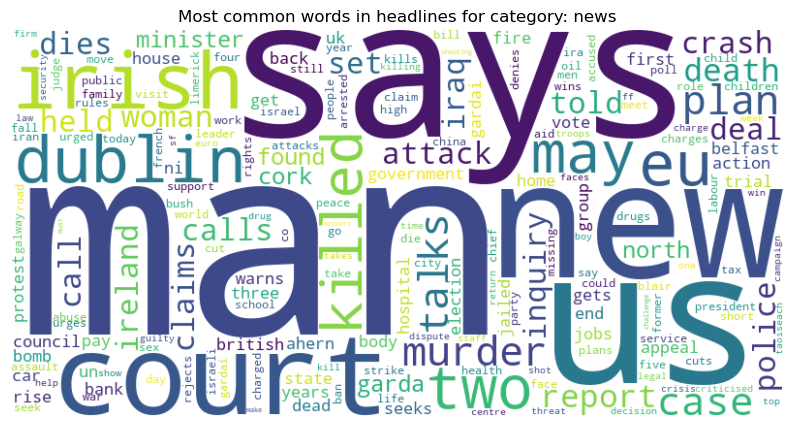

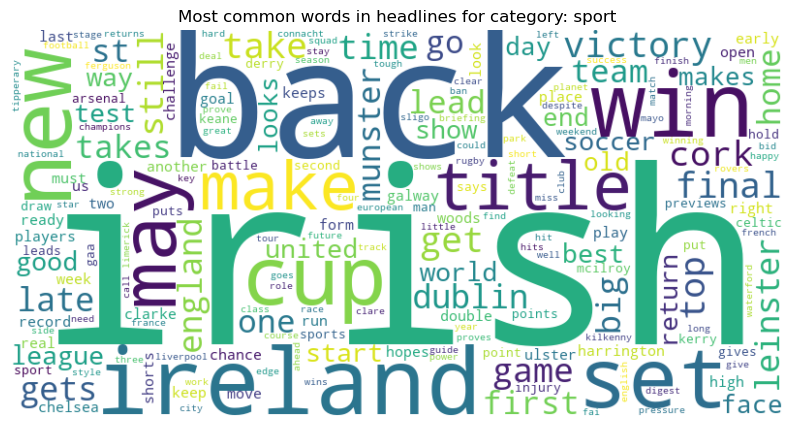

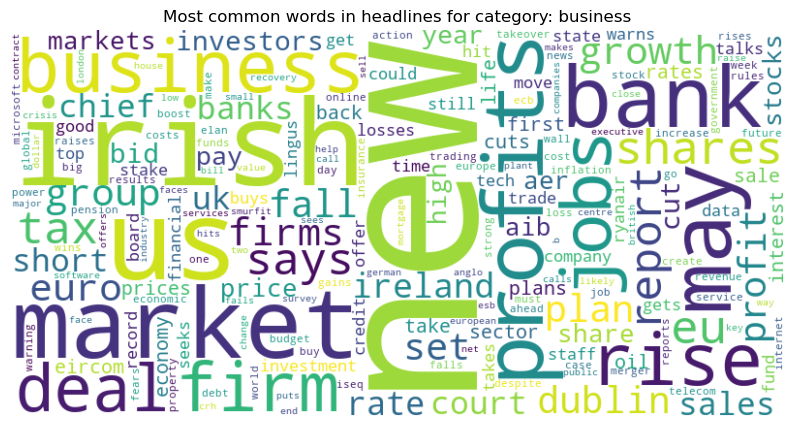

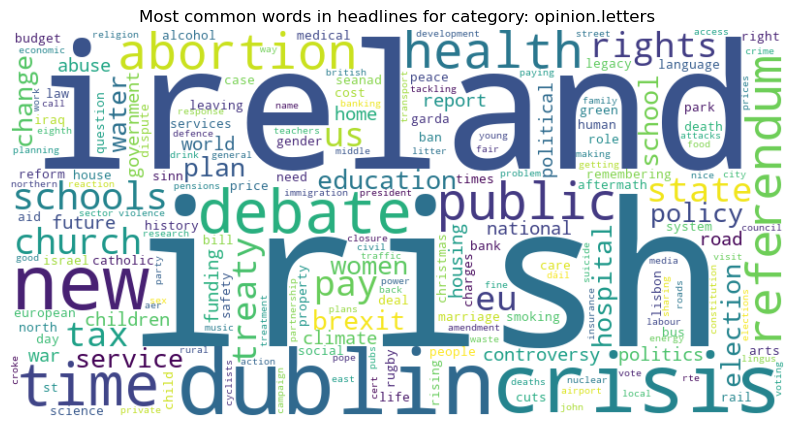

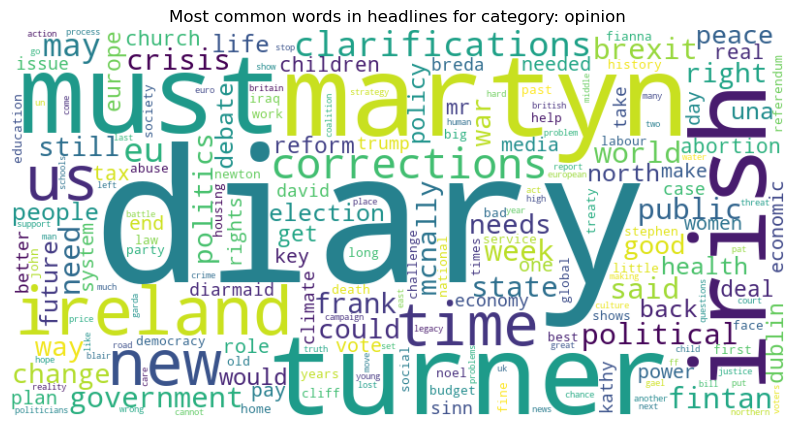

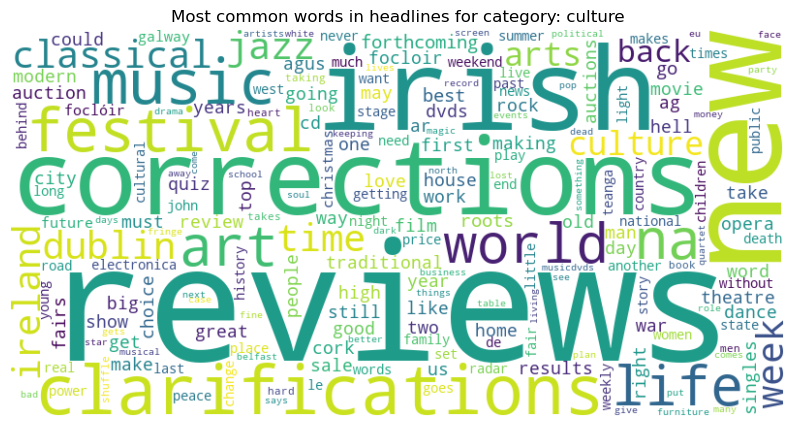

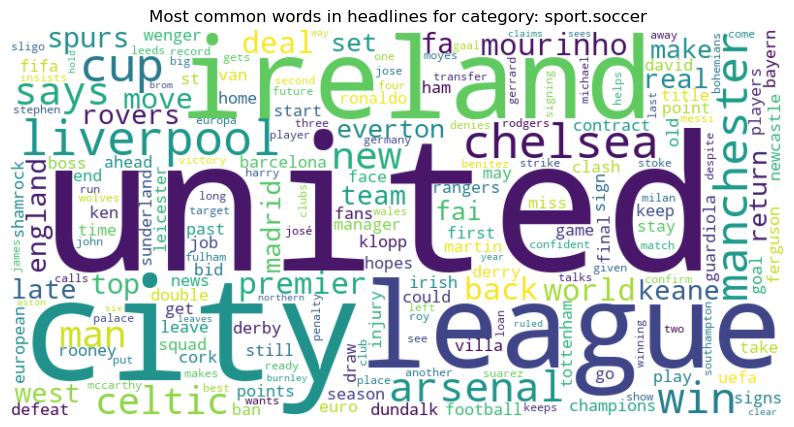

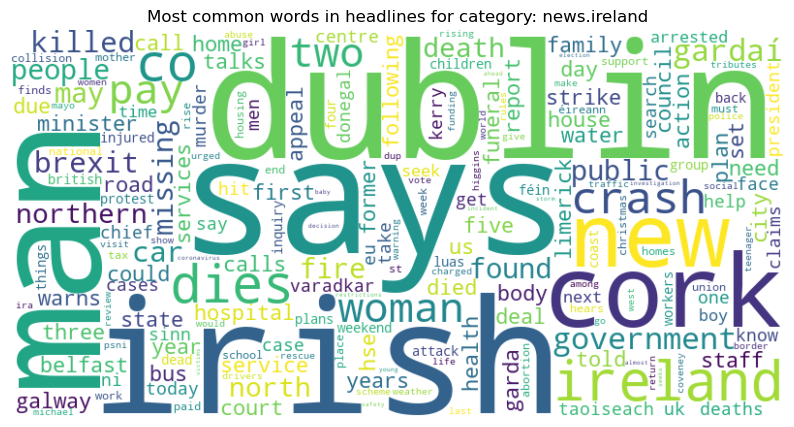

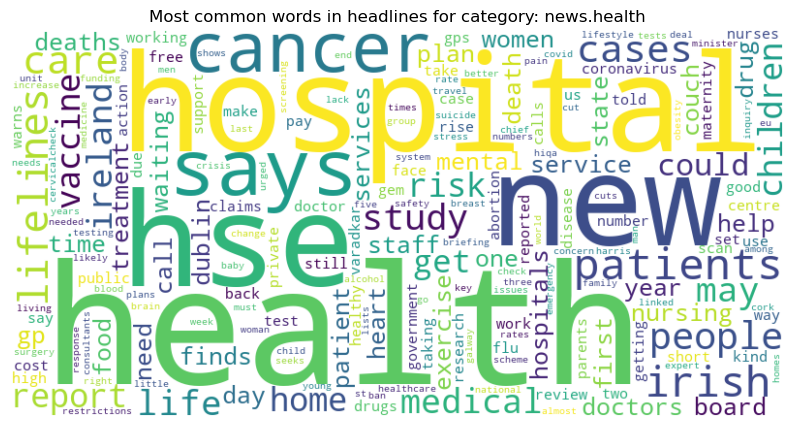

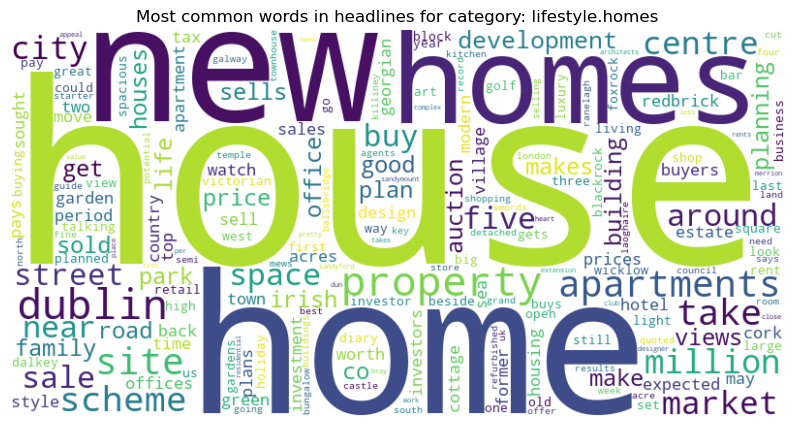

In [53]:
#Ensure NLTK stopwords are downloaded
nltk.download('stopwords')

#Get the top 10 most common categories
top_10_categories = category_counts.head(10)

#Get stopwords
stop_words = set(stopwords.words('english'))

#Loop through each of the top 10 categories
for category in top_10_categories.index:
    #Filter dataset by category
    category_data = dataset[dataset['headline_category'] == category]
    
    #Combine all headlines in that category into a single string
    all_headlines = ' '.join(category_data['headline_text'].fillna('').astype(str))
    
    #Tokenize and remove stopwords
    words = [word.lower() for word in all_headlines.split() if word.isalpha() and word.lower() not in stop_words]
    
    #Count the most common words
    word_counts = Counter(words)
    
    #Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    
    #Plot the word cloud for the current category
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most common words in headlines for category: {category}')
    plt.show()

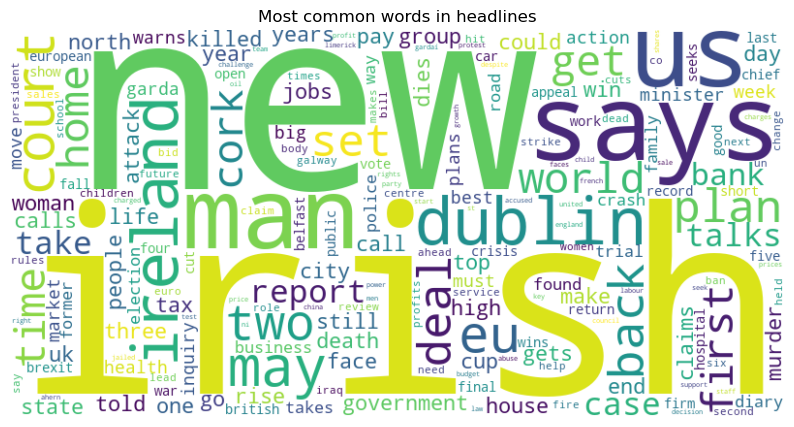

In [54]:
#Create Word Cloud for the entire dataset
#Combine all headlines into a single string
all_headlines = ' '.join(dataset['headline_text'].fillna('').astype(str))  #Fill NaN and ensure strings

#Tokenize the words and remove stopwords
words = [word.lower() for word in all_headlines.split() if word.isalpha() and word.lower() not in stop_words]

#Count the most common words
word_counts = Counter(words)

#Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

#Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most common words in headlines')
plt.show()

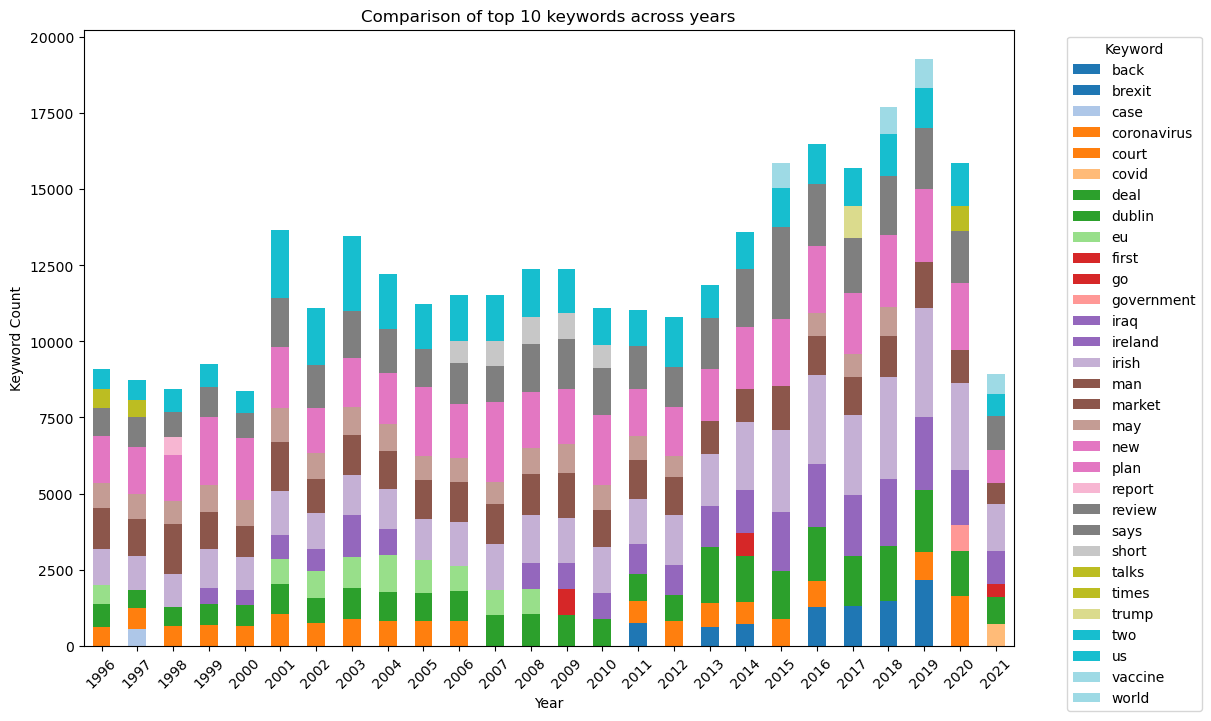

In [55]:
#Prepare the data for the stacked bar plot
top_keywords_by_year_flat = []

for year, keywords in top_keywords_by_year.items():
    for word, count in keywords:
        top_keywords_by_year_flat.append({'year': year, 'word': word, 'count': count})

#Create a DataFrame
top_keywords_df = pd.DataFrame(top_keywords_by_year_flat)

#Pivot the data to create a matrix with words as columns
pivot_df = top_keywords_df.pivot_table(index='year', columns='word', values='count', aggfunc='sum', fill_value=0)

#Plot the stacked bar plot
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title("Comparison of top 10 keywords across years")
plt.xlabel("Year")
plt.ylabel("Keyword Count")
plt.xticks(rotation=45)
plt.legend(title="Keyword", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### <b>Analyze Sentiment Over Time</b>

In [57]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [58]:
#Step 1: Preprocessing the headlines
#Ensure that 'headline_text' is a string (in case of NaN or unexpected values)
dataset['headline_text'] = dataset['headline_text'].fillna('').astype(str)

In [59]:
#Step 2: Define a function for sentiment classification
def get_sentiment(text):
    #Perform sentiment analysis using TextBlob
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    
    #Classify the sentiment based on polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

#Apply sentiment analysis to each headline
dataset['sentiment'] = dataset['headline_text'].apply(get_sentiment)

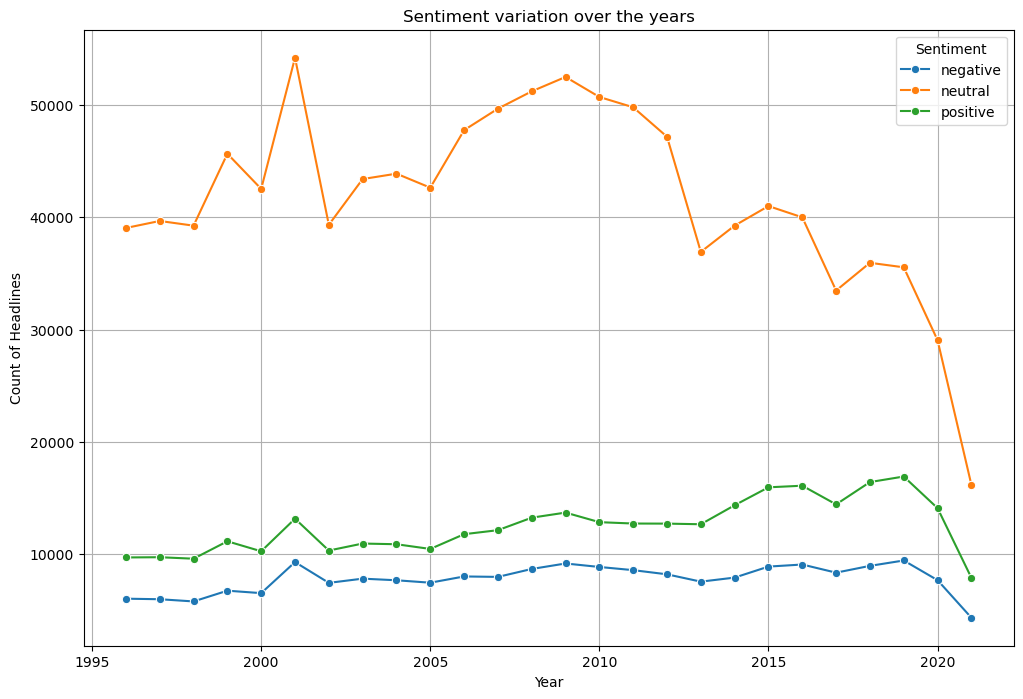

In [60]:
#Step 3: Compare sentiment variation over the years
#Group by 'year' and count the occurrences of each sentiment
sentiment_by_year = dataset.groupby(['year', 'sentiment']).size().reset_index(name='count')

#Plot the sentiment distribution over the years
plt.figure(figsize=(12, 8))
sns.lineplot(data=sentiment_by_year, x='year', y='count', hue='sentiment', marker='o')
plt.title('Sentiment variation over the years')
plt.xlabel('Year')
plt.ylabel('Count of Headlines')
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()

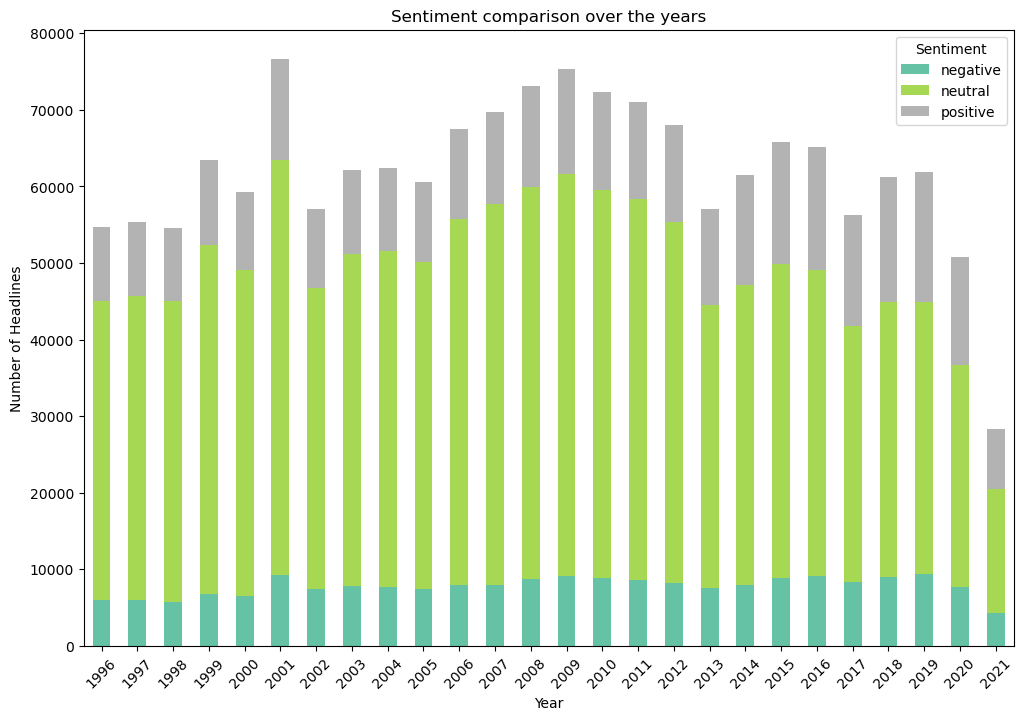

In [61]:
#Create a stacked bar chart to compare sentiment in each year
sentiment_pivot = sentiment_by_year.pivot(index='year', columns='sentiment', values='count').fillna(0)
sentiment_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set2')
plt.title('Sentiment comparison over the years')
plt.xlabel('Year')
plt.ylabel('Number of Headlines')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

## <b>Machine Learning</b>

## <u>Headline Category Classification</u>

In [64]:
# Define target variable and features
X = dataset['headline_text']  # Text of the headlines
y = dataset['headline_category']  # Category of the headline

In [65]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Create a pipeline with vectorizer and the RandomForest model
pipeline = make_pipeline(
    CountVectorizer(stop_words='english'),  # Bag of Words
    RandomForestClassifier(n_estimators=100, random_state=42)
)

In [ ]:
# Train the model
pipeline.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

In [ ]:
# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

## <u>Sentiment Analysis</u>

In [ ]:
# Function to perform sentiment analysis
def get_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)
    # Return sentiment: positive, negative, or neutral based on polarity
    if blob.sentiment.polarity > 0:
        return 'positive'
    elif blob.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
# Apply the sentiment function to each headline
dataset['sentiment'] = dataset['headline_text'].apply(get_sentiment)

In [ ]:
# Check the distribution of sentiments
print(dataset['sentiment'].value_counts())